# Homework 3  Math 104A

## Qingze Lan   3046380

### Question 1

(a). Lagrange form of $p_n(x)$:
$$\frac{(x-x_1)(x-x_2)...(x-x_n)}{(x_0-x_1)(x_0-x_2)...(x_0-x_n)}f(x_0)+\frac{(x-x_0)(x-x_2)...(x-x_n)}{(x_1-x_0)(x_1-x_2)...(x_0-x_n)}f(x_1)+...\\+\frac{(x-x_0)(x-x_1)...(x-x_{n-1})}{(x_n-x_0)(x_n-x_1)...(x_n-x_{n-1})}f(x_n)$$

Each term is a polynomial with highest degree n.

Therefore, the leading coefficient $p_n(x)$ is equal to $$\Sigma^n_{j=0}\frac{f_{(x_j)}}{\Pi ^{n}_{k=0,k\ne j}(x_j-x_k)}$$

For Newton's Form,
$$p_n(x) = f[x_0]+f[x_0,x_1](x-x_0)+...+f[x_0.x_1,...,x_n](x-x_0)(x-x_1)...(x-x_{n-1})$$


From the above equation we can see that the leading coefficient of $p_n(x)$ in Newton's form is only depend on the last term as it has the highest degree: n, which is same as that of the lagrange form of $p_n(x)$.


The coefficient of $x^n$ of the term $(x-x_0)(x-x_1)...(x-x_{n-1})$ is 1. 

Therefore, the leading coefficient for Newton's form is $$f[x_0,x_1,...,x_n]*1 = f[x_0,x_1,...,x_n]$$

As we are using these two forms to represent the same $p_n(x)$,the leading coefficient must be the same, so we can deduce that
$$f[x_0,x_1,...,x_n] = \Sigma^n_{j=0}\frac{f_{(x_j)}}{\Pi ^{n}_{k=0,k\ne j}(x_j-x_k)}$$

(b). For any permutation of $x_0,x_1,...x_n$, the number of the total nodes will not change and will always equal to n. RHS of equation (1) is the sum of $\frac{f(x_j)}{\Pi^n_{k=0,k\ne j}}$ for each nodes in $x_0,x_1,...,x_n$. Because of the commutative law of addition, the final result will not change if we change the permutation of these terms. Therefore, RHS of equation (1) will not change by changing the permutation of the nodes. As a result, the LHS of this equation, the divided differences, also don't change. 

### Question 2

(a)

In [1]:
import numpy as np
import math
# change the given qseudocode into python code 
# listofx refers to the list of x we have. 
# listofy refers to the list of f(x) we get. 
def coef(listofx,listofy):
    n = len(listofx)-1
    C=np.zeros(n+1)
    for j in range(n+1):
        C[j]=listofy[j]
    for i in range(1,n+1):
        for j in range(n,i-1,-1):
            C[j]=(C[j]-C[j-1])/(listofx[j]-listofx[j-i])
    return C
# code for evaluate the interpolation polynomial in Newton's form
def Newton(listofc, listofx, X):
    n = len(listofc)-1
    # base case
    polynomial = listofc[n]
    for j in range(n-1,-1,-1):
        polynomial = listofc[j]+(X-listofx[j])*polynomial
    return polynomial

# Check it 
[Newton([1,1,1,0],[0,1,2,3],0), Newton([1,1,1,0],[0,1,2,3],2),Newton([1,1,1,0],[0,1,2,3],3)]

[1, 5, 10]

(b)

In [2]:
# Define the function f(x) = e^(-x^2)
def exp2(x):
    xi = float(math.exp(-x**2))
    return xi

In [3]:
# Get the list of y we need
def listy(f,listofx):
    listy = []
    for xi in listofx:
        listy.append(f(xi))
    return listy

# Get listofx
def listx(n):
    listofx = list(np.linspace(-1,1,n+1))
    return listofx

y = listy(exp2,listx(10))
# nodes used
x1 = listx(10)
# nodes to evaluate 
x2 = np.linspace(-1,1,100)

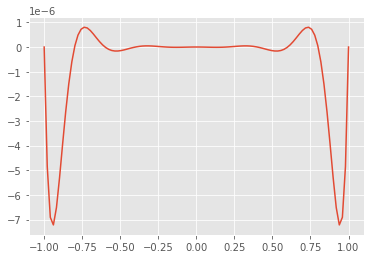

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# pointsP refers to p_10(x)
pointsP = np.array([Newton(coef(x1,y),x1,x) for x in x2])

# pointsF refers to f(x)
pointsF = np.array([exp2(x) for x in x2])

# pointsE refers to the error f(x)-p_10(x)
pointsE = np.array([exp2(x)-Newton(coef(x1,y),x1,x) for x in x2])
#plt.plot(x2,pointsP)
#plt.plot(x2,pointsF)
plt.plot(x2,pointsE)

### Question 3

Let $f(x) = x-e^{-x}$

Let $y_0=f(x_0)$ and $y_1=f(x_1)$

Let $f(x) = y$

$ y_0 = f(0.5) = -0.106530659712633$

$y_1 = f(0.6) = 0.051188363905973$

$x_0 = 0.5$

$x_1 = 0.6$

Using these data $x = \frac{y-y_1}{y_0-y_1}x_0+\frac{y-y_0}{y_1-y_0}x_1$

In [5]:
y0 = -0.106530659712633
y1 = 0.051188363905973
y0-y1

-0.15771902361860599

$$p_0(y) = \frac{y-y_1}{y_0-y_1}$$

In [6]:
# Get P0(0)
p0_0 = -y1/(y0-y1)
p0_0

0.32455415162698453

In [7]:
# Get P1(0)
p1_0 = (0-y0)/(y1-y0)
p1_0

0.6754458483730156

$$y^{-1}(0) = \chi = p_0(0)(0.5)+p_1(0)(0.6)$$

In [8]:
# Get the Result
p0_0*0.5+p1_0*0.6

0.5675445848373015

### Question 4

Construct the table of divided differences:

0   0

0   0  0  

1   2  2  2

1   2  3  1  -1

$p(x) = 0+0(x-0)+2(x-0)^2-1(x-0)^2(x-1)\\=2x^2-x^2(x-1)\\=x^2(2-x+1)\\=x^2(3-x)\\=3x^2-x^3$

$p'(x)=6x-3x^2$

### Question 5

For natural spline S(x), we know that $z_0 = z_n = 0$. 
$$s_j(x) = A_j(x-x_j)^3+B_j(x-x_j)^2+c_j(x-x_j)+D_j$$
$$h_j=x_{j+1}-x_j$$
$$z_j=s''_j(x_j)$$
$$z_{j+1}=s''_j(x_{j+1})$$
$$A_j=\frac{1}{6h_j}(z_{j+1}-z_j)$$
$$B_j=\frac{1}{2}z_j$$
$$C_j= \frac{1}{h_j}(f_{j+1}-f_j)-\frac{1}{6}h_j(z_{j+1}+2z_j)$$
$$D_j=f_j = y_j$$ 
h is not a constant as the points may not be equidistributed. 

We need to write the linear system of equations to calculate the value of $z_1,z_2,....,z_{n-1}$

In [9]:
# Represent aj, bj, and cj as defined
# listofx and listofy is the given points(x_0,y_0), (x_1,y_1),...,(x_n,y_n), where x_0<x_1<x_2<...<x_n

# A is the list of aj, B is list of bj, C is list of cj

def A(listofx):
    N = len(listofx)
    A = []
    for j in range(1,N-1):
        A.append(2*(listofx[j]-listofx[j-1]+listofx[j+1]-listofx[j]))
    return A

def B(listofx):
    N = len(listofx)
    B = []
    for j in range(1,N-2):
        B.append(listofx[j+1]-listofx[j])
    return B
def C(listofx):
    N = len(listofx)
    C = []
    for j in range(1,N-2):
        C.append(listofx[j+1]-listofx[j])
    return C

# aj, bj, and cj is the jth item in list A, B, and C

# Determine column D: [d_1,d_2,...,d_n-1]^T
def D(listofx,listofy):
    D = []
    N = len(listofx)
    for j in range(1,N-1):
        D.append(-6/(listofx[j]-listofx[j-1])*(listofy[j]-listofy[j-1])+6/(listofx[j+1]-listofx[j])*(listofy[j+1]-listofy[j]))
    return D

# The Triadiagonal Solver
# determine the factorization coefficients 
def LM(A,B,C):
    N = len(A)
    M = []
    L = []
    M.append(A[0])
    for j in range(1,N):
        L.append(C[j-1]/M[j-1])
        M.append(A[j]-L[j-1]*B[j-1])
    return [L,M]
# uj is equal to bj so we just use B instead of U. 

# Forward substitution on Ly = d
def Y(A,D,L):
    N = len(A)
    Y=[]
    Y.append(D[0])
    for j in range(1,N):
        Y.append(D[j]-L[j-1]*Y[j-1])
    return Y
# Backward substitution to solve Ux = y 
def Z(Y,M,A,B):
    N = len(A)
    Z = list(np.zeros(N+1))
    Z[N]=0
    Z[N-1]=Y[N-1]/M[N-1]
    for j in range(N-1,0,-1):
        Z[j-1]=(Y[j-1]-B[j-1]*Z[j])/M[j-1]
    Z.insert(0,0)
    return Z
# list Z is the list of z we want to know to calculate the final answer. 
# Add z0 and zn = 0

def sj(x,j,listofx,listofy,Zr):
    Aj = 1/6/(listofx[j+1]-listofx[j])*(Zr[j+1]-Zr[j])
    Bj = 1/2*(Zr[j])
    Cj = 1/(listofx[j+1]-listofx[j])*(listofy[j+1]-listofy[j])-1/6*(listofx[j+1]-listofx[j])*(Zr[j+1]+2*Zr[j])
    Dj = listofy[j]
    return Aj*(x-listofx[j])**3+Bj*(x-listofx[j])**2+Cj*(x-listofx[j])+Dj

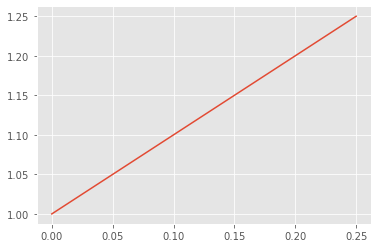

In [10]:
a = [0,0.25,0.5,0.75,1]
b = [1,1.25,1.5,1.75,2]
a1 = A(a)
b1 = B(a)
c1 = C(a)
d1 = D(a,b)
lm1 = LM(a1,b1,c1)
l1 = lm1[0]
m1 = lm1[1]
y1 = Y(a1,d1,l1)
z1=Z(y1,m1,a1,b1)
q0 = np.linspace(0,0.25,100)
points = np.array([sj(t,0,a,b,z1)for t in q0])
plt.plot(q0,points)

### Question 6

In [11]:
listofy = [1.50,0.90,1.00,0.80,0.45,0.20,0.10,0.20,0.25]
listoft = [0,0.618,0.935,1.255,1.636,1.905,2.317,2.827,3.330]
listofx = [1.50,0.90,0.60,0.35,0.2,0.1,0.5,1,1.5]
# For (t,x):
A1 = A(listoft)
B1 = B(listoft)
C1 = C(listoft)
D1 = D(listoft,listofx)
LM1 = LM(A1,B1,C1)
L1 = LM1[0]
M1 = LM1[1]
Y1 = Y(A1,D1,L1)
Z1 = Z(Y1,M1,A1,B1)

# For (t,y):
A2 = A(listoft)
B2 = B(listoft)
C2 = C(listoft)
D2 = D(listoft,listofy)
LM2 = LM(A2,B2,C2)
L2 = LM2[0]
M2 = LM2[1]
Y2 = Y(A2,D2,L2)
Z2 = Z(Y2,M2,A2,B2)

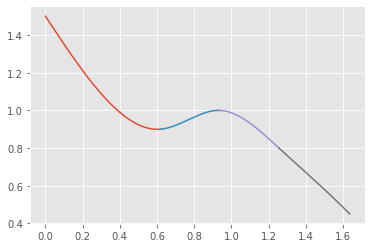

In [12]:
t0 = np.linspace(0,0.618,500)
t1 = np.linspace(0.618,0.935,500)
t2 = np.linspace(0.935,1.255,500)
t3 = np.linspace(1.255,1.636,500)
t4 = np.linspace(1.636,1.905,500)
t5 = np.linspace(1.905,2.317,500)
t6 = np.linspace(2.317,2.827,500)
t7 = np.linspace(2.827,3.330,500)

points_t0x = np.array([sj(t,0,listoft,listofx,Z1)for t in t0])
points_t1x = np.array([sj(t,1,listoft,listofx,Z1)for t in t1])
points_t2x = np.array([sj(t,2,listoft,listofx,Z1)for t in t2])
points_t3x = np.array([sj(t,3,listoft,listofx,Z1)for t in t3])
points_t4x = np.array([sj(t,4,listoft,listofx,Z1)for t in t4])
points_t5x = np.array([sj(t,5,listoft,listofx,Z1)for t in t5])
points_t6x = np.array([sj(t,6,listoft,listofx,Z1)for t in t6])
points_t7x = np.array([sj(t,7,listoft,listofx,Z1)for t in t7])

points_t0y = np.array([sj(t,0,listoft,listofy,Z2)for t in t0])
points_t1y = np.array([sj(t,1,listoft,listofy,Z2)for t in t1])
points_t2y = np.array([sj(t,2,listoft,listofy,Z2)for t in t2])
points_t3y = np.array([sj(t,3,listoft,listofy,Z2)for t in t3])
points_t4y = np.array([sj(t,4,listoft,listofy,Z2)for t in t4])
points_t5y = np.array([sj(t,5,listoft,listofy,Z2)for t in t5])
points_t6y = np.array([sj(t,6,listoft,listofy,Z2)for t in t6])
points_t7y = np.array([sj(t,7,listoft,listofy,Z2)for t in t7])
plt.plot(t0,points_t0y)
plt.plot(t1,points_t1y)
plt.plot(t2,points_t2y)
plt.plot(t3,points_t3y)